# Mnist_Fashion

Fashion-MNIST is a dataset of Zalando's article images—consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

The training and test data sets have 785 columns. The first column consists of the class labels and represents the article of clothing. The rest of the columns contain the pixel-values of the associated image.

In [80]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
os.listdir(".")

['.ipynb_checkpoints',
 'fashion-mnist_test.csv',
 'fashion-mnist_train.csv',
 'fashionmnist.zip',
 'mnist_fashion.ipynb',
 'Mnist_offline.ipynb',
 't10k-images-idx3-ubyte',
 't10k-labels-idx1-ubyte',
 'train-images-idx3-ubyte',
 'train-labels-idx1-ubyte']

In [6]:
df_test = pd.read_csv("fashion-mnist_test.csv")
df_train = pd.read_csv("fashion-mnist_train.csv")

In [8]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df_train.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [30]:
train_labels = df_train["label"]
test_labels = df_test["label"]

In [44]:
train_features = df_train.iloc[:,1:]
test_features = df_test.iloc[:,1:]

In [56]:
x_train = train_features.values
x_test = test_features.values
y_train = train_labels.values
y_test = test_labels.values

In [57]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [87]:
class_names = ["0.T-shirt/top","1.Trouser","2.Pullover","3.Dress","4.Coat","5.Sandal","6.Shirt","7.Sneaker","8.Bag","9.Ankle boot"]
display(class_names)

['0.T-shirt/top',
 '1.Trouser',
 '2.Pullover',
 '3.Dress',
 '4.Coat',
 '5.Sandal',
 '6.Shirt',
 '7.Sneaker',
 '8.Bag',
 '9.Ankle boot']

# One hot encoding

In [61]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train) 
y_test = to_categorical(y_test)

# Normalizing data

In [70]:
x_train = x_train/255.0
x_test = x_test/255.0

# First Model

In [75]:
models = tf.keras.Sequential
layers = tf.keras.layers

model = models([layers.Dense(512,activation="relu",input_shape=(28 * 28,)),
                #layers.Flatten(),
                layers.Dense(64,activation="relu"),
                layers.Dense(16,activation="relu"),
                layers.Dense(10, activation='softmax')])

model.compile(optimizer="adam", # adam # rmsprop
             loss="categorical_crossentropy",
             metrics=["accuracy"])

history = model.fit(x_train,y_train,epochs=10,validation_split=(0.2))

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 8s 175us/sample - loss: 0.5349 - accuracy: 0.8093 - val_loss: 0.4471 - val_accuracy: 0.8363
Epoch 2/10
48000/48000 [==============================] - 7s 151us/sample - loss: 0.3835 - accuracy: 0.8598 - val_loss: 0.3696 - val_accuracy: 0.8675
Epoch 3/10
48000/48000 [==============================] - 7s 154us/sample - loss: 0.3469 - accuracy: 0.8732 - val_loss: 0.3529 - val_accuracy: 0.8744
Epoch 4/10
48000/48000 [==============================] - 7s 150us/sample - loss: 0.3175 - accuracy: 0.8834 - val_loss: 0.3313 - val_accuracy: 0.8818
Epoch 5/10
48000/48000 [==============================] - 7s 151us/sample - loss: 0.2956 - accuracy: 0.8898 - val_loss: 0.3268 - val_accuracy: 0.8799
Epoch 6/10
48000/48000 [==============================] - 7s 150us/sample - loss: 0.2811 - accuracy: 0.8949 - val_loss: 0.3299 - val_accuracy: 0.8820
Epoch 7/10
48000/48000 [==========================

# Evaluating

In [77]:
evaluation = model.evaluate(x_test,y_test,verbose=2)
print()
print("Loss: ",evaluation[0]*100,"%")
print("Accuracy: ",evaluation[1]*100,"%")

10000/1 - 1s - loss: 0.2417 - accuracy: 0.8932

Loss:  30.070194331407546 %
Accuracy:  89.31999802589417 %


In [78]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Plotting the training and validation loss

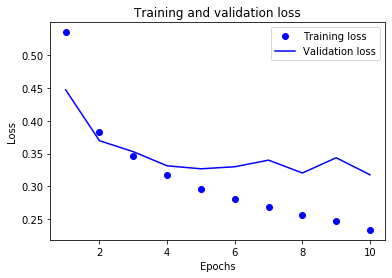

In [81]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plotting the training and validation Accuracy

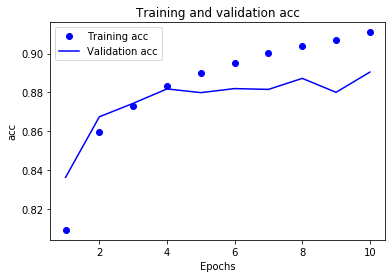

In [82]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

# Predict

In [88]:
predict = 8
a = model.predict_classes(x_test)[predict]
print("Predicted value: ",a)
print("Actual value: ",np.argmax(y_test[predict]))
display(class_names)

Predicted value:  5
Actual value:  5


['0.T-shirt/top',
 '1.Trouser',
 '2.Pullover',
 '3.Dress',
 '4.Coat',
 '5.Sandal',
 '6.Shirt',
 '7.Sneaker',
 '8.Bag',
 '9.Ankle boot']

# Hyperperameter Tuning

In [89]:
def tunning(epochs,batch_size,drop_ratio):
    
    models = tf.keras.Sequential
    layers = tf.keras.layers

    model1 = models([layers.Dense(512,activation="relu",input_shape=(28 * 28,)),
                layers.Flatten(),
                layers.Dense(64,activation="relu"),
                layers.Dropout(drop_ratio),
                layers.Dense(16,activation="relu"),
                layers.Dense(10, activation='softmax')])

    model1.compile(optimizer="adam", # adam # rmsprop
             loss="categorical_crossentropy",
             metrics=["accuracy"])

    history = model1.fit(x_train,y_train,epochs=epochs,batch_size = 128,validation_split=(0.2))
    
    evaluation = model1.evaluate(x_test,y_test,verbose=2)
    print()
    print("Loss: ",evaluation[0]*100,"%")
    print("Accuracy: ",evaluation[1]*100,"%")
    #return model1

In [92]:
epochs = 20
batch_size = 256
drop_ratio = 0.001
tunning(epochs,batch_size,drop_ratio)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 76us/sample - loss: 0.6565 - accuracy: 0.7741 - val_loss: 0.4363 - val_accuracy: 0.8498
Epoch 2/20
48000/48000 [==============================] - 3s 57us/sample - loss: 0.4078 - accuracy: 0.8554 - val_loss: 0.3862 - val_accuracy: 0.8602
Epoch 3/20
48000/48000 [==============================] - 3s 57us/sample - loss: 0.3585 - accuracy: 0.8711 - val_loss: 0.3577 - val_accuracy: 0.8724
Epoch 4/20
48000/48000 [==============================] - 3s 59us/sample - loss: 0.3291 - accuracy: 0.8805 - val_loss: 0.3419 - val_accuracy: 0.8773
Epoch 5/20
48000/48000 [==============================] - 3s 60us/sample - loss: 0.3074 - accuracy: 0.8873 - val_loss: 0.3452 - val_accuracy: 0.8751
Epoch 6/20
48000/48000 [==============================] - 3s 53us/sample - loss: 0.2902 - accuracy: 0.8929 - val_loss: 0.3385 - val_accuracy: 0.8802
Epoch 7/20
48000/48000 [==============================] 